In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#load the handwritten digits dataset
from sklearn import datasets
digits = datasets.load_digits()

In [62]:
dir(digits)#returns the information is stored in the object in the form of other objects

['DESCR', 'data', 'images', 'target', 'target_names']

In [63]:
print (type (digits.images)) 
print (type (digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [64]:
digits.images.shape 

(1797, 8, 8)

In [65]:
print (digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [66]:
print (digits.target.shape)
print (digits.target)

(1797,)
[0 1 2 ... 8 9 8]


It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. 

In [76]:
def plot_multi(i):
    '''Plots 12 digits, starting with digit i'''
    nplots = 12
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,3,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

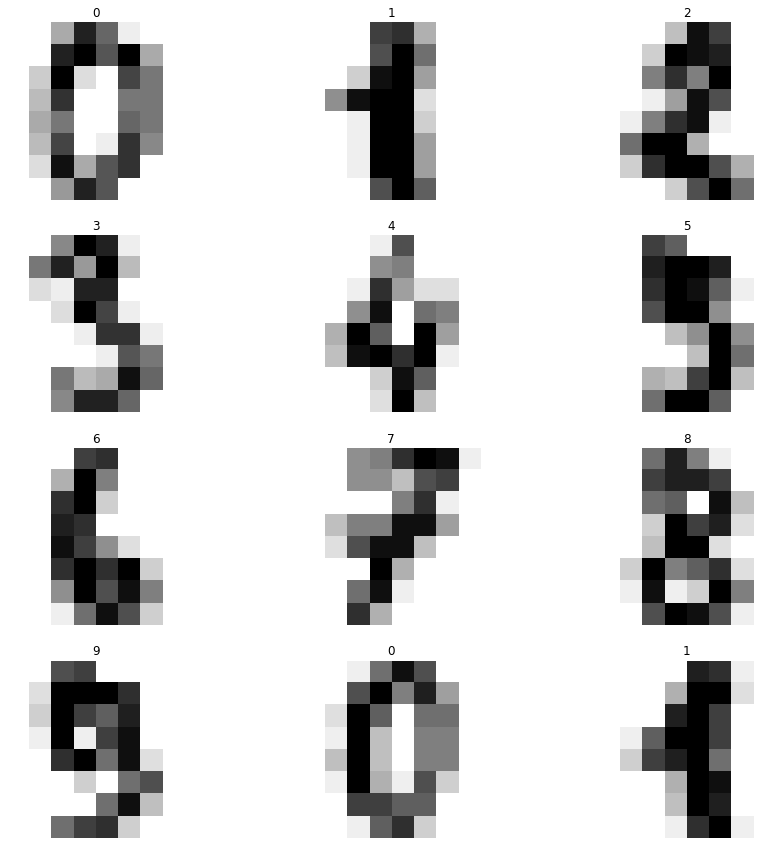

In [77]:
plot_multi(0)

# Building the network and preparing the input data 

In [69]:
 #The input layer requires a 1-dimensional array in input convert 2D-image to 1D-image
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

In [70]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [71]:
#The first 1000 images and labels are going to be used for training. 
#The rest of the dataset will be used later to test the performance of our network.
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

In [72]:
#We can now create the neural network. We use one hidden layers with 15 neurons, 
#and scikit-learn is smart enough to find out how many numbers to use in the input and output layers.
#Don't pay attention to the other parameters
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

In [73]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.1, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [74]:
#apply test set
predictions = mlp.predict(x_test)
predictions[:50] 

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [75]:
y_test[:50] 

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

These predictions  close to the targets of our training sample

In [60]:
accuracy_score(y_test, predictions)

0.9146800501882058